In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ASSIGNMENT 1: Training your own NER model

In this lab we will train a NER model in a **language of your interest** and use it to tag texts for that language. To train a NER (SequenceTagger) model we need the following:


1. An annotated corpus in the IOB2 format. You can load your own or use one of the many available in Flair: https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_6_CORPUS.md#named-entity-recognition
  + CoNLL 2003 for English and German are not publicly available but you can find the required files in the following google drive folder:
  '/content/drive/My Drive/Colab Notebooks/2023-ILTAPP/datasets/ner'
2. At least one WordEmbedding or FlairEmbeddings. You can check the ones available in the tutorial.
  + Static Word Embeddings:https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/CLASSIC_WORD_EMBEDDINGS.md
  + FlairEmbeddings: https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/FLAIR_EMBEDDINGS.md
  + NOTE: Remember that the embeddings can be combined (Stacked): https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md
3. Instantiate a SequenceTagger and a Model Trainer: https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_7_TRAINING_A_MODEL.md
4. Run! (perhaps consider downsampling the training data and setting at first a lower number of epochs, just to check that the training works).
5. HINT: You can also print your corpus statistics using the corpus obtain_statistics() function. This will give you an idea of the size of your dataset.

In [14]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings
from typing import List

In [15]:
text_path= "/content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner"


#  get the corpus into a ColumnCorpus object
from flair.data import Corpus
from flair.datasets import ColumnCorpus

columns={0:"word",1:"ner"}

corpus: Corpus = ColumnCorpus(text_path, columns,
                              train_file='en-train.tsv',
                              test_file='en-testa.tsv',
                              dev_file='en-testb.tsv')
# obtain and print corpus statistics (output below obtained with the English NER corpus)
print(corpus.obtain_statistics())

2023-02-16 17:04:14,867 Reading data from /content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner
2023-02-16 17:04:14,869 Train: /content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/en-train.tsv
2023-02-16 17:04:14,871 Dev: /content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/en-testb.tsv
2023-02-16 17:04:14,874 Test: /content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/en-testa.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 14987,
        "number_of_documents_per_class": {
            "ORG": 6321,
            "MISC": 3438,
            "PER": 6600,
            "LOC": 7140
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 204567,
            "min": 1,
            "max": 113,
            "avg": 13

In [16]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_label_dictionary(label_type='ner')
print(tag_dictionary.idx2item)

2023-02-16 17:04:28,894 Computing label dictionary. Progress:


14987it [00:00, 45762.52it/s]

2023-02-16 17:04:29,230 Dictionary created for label 'ner' with 5 values: LOC (seen 7140 times), PER (seen 6600 times), ORG (seen 6321 times), MISC (seen 3438 times)
[b'<unk>', b'LOC', b'PER', b'ORG', b'MISC']


In [17]:
# DONE initialize embeddings (output below refers to WordEmbeddings('en'), 
# FlairEmbeddings('en-forward') and FlairEmbeddings('en-backward'))
embeddings=WordEmbeddings('en')
flair_embedding_forward = FlairEmbeddings('en-forward')
flair_embedding_backward = FlairEmbeddings('en-backward')


In [18]:
# DONE initialize sequence tagger
from flair.models import SequenceTagger

ner_tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=tag_dictionary,
                        tag_type=tag_type,
                        use_crf=True)

2023-02-16 17:04:57,821 SequenceTagger predicts: Dictionary with 17 tags: O, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-MISC, B-MISC, E-MISC, I-MISC


In [19]:
# TODO initialize trainer
from flair.trainers import ModelTrainer
trainer: ModelTrainer = ModelTrainer(ner_tagger, corpus)

In [20]:
# TODO train 
trainer.train('/content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/flairen_model', train_with_dev=False,  write_weights=True, max_epochs=10)


/usr/local/lib/python3.8/dist-packages/flair/trainers/trainer.py:64: UserWarning: There should be no best model saved at epoch 1 except there is a model from previous trainings in your training folder. All previous best models will be deleted.
  warnings.warn(


2023-02-16 17:05:06,310 ----------------------------------------------------------------------------------------------------
2023-02-16 17:05:06,315 Model: "SequenceTagger(
  (embeddings): WordEmbeddings(
    'en'
    (embedding): Embedding(1000001, 300)
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=300, out_features=300, bias=True)
  (rnn): LSTM(300, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=19, bias=True)
  (loss_function): ViterbiLoss()
  (crf): CRF()
)"
2023-02-16 17:05:06,318 ----------------------------------------------------------------------------------------------------
2023-02-16 17:05:06,321 Corpus: "Corpus: 14987 train + 3684 dev + 3466 test sentences"
2023-02-16 17:05:06,323 ----------------------------------------------------------------------------------------------------
2023-02-16 17:05:06,325 Parameters:
2023-02-16 17:05:06,327  - learning_rate:

100%|██████████| 116/116 [00:12<00:00,  9.25it/s]


2023-02-16 17:05:57,071 Evaluating as a multi-label problem: False
2023-02-16 17:05:57,167 DEV : loss 0.14467139542102814 - f1-score (micro avg)  0.7691
2023-02-16 17:05:57,400 BAD EPOCHS (no improvement): 0
2023-02-16 17:05:57,411 saving best model
2023-02-16 17:06:04,812 ----------------------------------------------------------------------------------------------------
2023-02-16 17:06:08,679 epoch 2 - iter 46/469 - loss 0.20731515 - samples/sec: 383.05 - lr: 0.100000
2023-02-16 17:06:14,127 epoch 2 - iter 92/469 - loss 0.20276428 - samples/sec: 300.38 - lr: 0.100000
2023-02-16 17:06:20,346 epoch 2 - iter 138/469 - loss 0.20278573 - samples/sec: 265.54 - lr: 0.100000
2023-02-16 17:06:24,188 epoch 2 - iter 184/469 - loss 0.19763954 - samples/sec: 450.93 - lr: 0.100000
2023-02-16 17:06:27,328 epoch 2 - iter 230/469 - loss 0.19344312 - samples/sec: 533.80 - lr: 0.100000
2023-02-16 17:06:31,685 epoch 2 - iter 276/469 - loss 0.19060306 - samples/sec: 376.37 - lr: 0.100000
2023-02-16 17:0

100%|██████████| 116/116 [00:09<00:00, 12.78it/s]

2023-02-16 17:06:57,875 Evaluating as a multi-label problem: False


2023-02-16 17:06:57,928 DEV : loss 0.10558578372001648 - f1-score (micro avg)  0.8183
2023-02-16 17:06:58,063 BAD EPOCHS (no improvement): 0
2023-02-16 17:06:58,071 saving best model
2023-02-16 17:07:04,994 ----------------------------------------------------------------------------------------------------
2023-02-16 17:07:07,859 epoch 3 - iter 46/469 - loss 0.16636665 - samples/sec: 515.65 - lr: 0.100000
2023-02-16 17:07:13,320 epoch 3 - iter 92/469 - loss 0.15919699 - samples/sec: 294.53 - lr: 0.100000
2023-02-16 17:07:19,540 epoch 3 - iter 138/469 - loss 0.15908350 - samples/sec: 258.26 - lr: 0.100000
2023-02-16 17:07:24,215 epoch 3 - iter 184/469 - loss 0.15651257 - samples/sec: 368.86 - lr: 0.100000
2023-02-16 17:07:27,272 epoch 3 - iter 230/469 - loss 0.15489098 - samples/sec: 553.91 - lr: 0.100000
2023-02-16 17:07:30,348 epoch 3 - iter 276/469 - loss 0.15285372 - samples/sec: 548.28 - lr: 0.100000
2023-02-16 17:07:34,192 epoch 3 - iter 322/469 - loss 0.15164167 - samples/sec: 42

100%|██████████| 116/116 [00:11<00:00,  9.77it/s]

2023-02-16 17:07:58,592 Evaluating as a multi-label problem: False
2023-02-16 17:07:58,644 DEV : loss 0.0931595042347908 - f1-score (micro avg)  0.8321


2023-02-16 17:07:58,803 BAD EPOCHS (no improvement): 0
2023-02-16 17:07:58,810 saving best model
2023-02-16 17:08:05,161 ----------------------------------------------------------------------------------------------------
2023-02-16 17:08:09,147 epoch 4 - iter 46/469 - loss 0.13948368 - samples/sec: 370.64 - lr: 0.100000
2023-02-16 17:08:13,615 epoch 4 - iter 92/469 - loss 0.13732965 - samples/sec: 363.53 - lr: 0.100000
2023-02-16 17:08:18,902 epoch 4 - iter 138/469 - loss 0.13771250 - samples/sec: 332.72 - lr: 0.100000
2023-02-16 17:08:24,886 epoch 4 - iter 184/469 - loss 0.13574449 - samples/sec: 271.34 - lr: 0.100000
2023-02-16 17:08:28,622 epoch 4 - iter 230/469 - loss 0.13460414 - samples/sec: 472.60 - lr: 0.100000
2023-02-16 17:08:31,704 epoch 4 - iter 276/469 - loss 0.13256606 - samples/sec: 545.91 - lr: 0.100000
2023-02-16 17:08:34,819 epoch 4 - iter 322/469 - loss 0.13084989 - samples/sec: 539.29 - lr: 0.100000
2023-02-16 17:08:38,882 epoch 4 - iter 368/469 - loss 0.12969500 -

100%|██████████| 116/116 [00:11<00:00,  9.78it/s]


2023-02-16 17:08:58,556 Evaluating as a multi-label problem: False
2023-02-16 17:08:58,611 DEV : loss 0.08597810566425323 - f1-score (micro avg)  0.8502
2023-02-16 17:08:58,752 BAD EPOCHS (no improvement): 0
2023-02-16 17:08:58,760 saving best model
2023-02-16 17:09:05,037 ----------------------------------------------------------------------------------------------------
2023-02-16 17:09:08,105 epoch 5 - iter 46/469 - loss 0.12050416 - samples/sec: 480.97 - lr: 0.100000
2023-02-16 17:09:14,255 epoch 5 - iter 92/469 - loss 0.12029279 - samples/sec: 257.46 - lr: 0.100000
2023-02-16 17:09:20,187 epoch 5 - iter 138/469 - loss 0.11700985 - samples/sec: 281.59 - lr: 0.100000
2023-02-16 17:09:24,450 epoch 5 - iter 184/469 - loss 0.11780833 - samples/sec: 402.61 - lr: 0.100000
2023-02-16 17:09:28,899 epoch 5 - iter 230/469 - loss 0.11806730 - samples/sec: 366.11 - lr: 0.100000
2023-02-16 17:09:31,983 epoch 5 - iter 276/469 - loss 0.11779011 - samples/sec: 553.49 - lr: 0.100000
2023-02-16 17:0

100%|██████████| 116/116 [00:09<00:00, 12.22it/s]


2023-02-16 17:09:56,250 Evaluating as a multi-label problem: False
2023-02-16 17:09:56,317 DEV : loss 0.07747369259595871 - f1-score (micro avg)  0.863
2023-02-16 17:09:56,563 BAD EPOCHS (no improvement): 0
2023-02-16 17:09:56,570 saving best model
2023-02-16 17:10:03,876 ----------------------------------------------------------------------------------------------------
2023-02-16 17:10:06,753 epoch 6 - iter 46/469 - loss 0.11009228 - samples/sec: 514.40 - lr: 0.100000
2023-02-16 17:10:10,018 epoch 6 - iter 92/469 - loss 0.11294545 - samples/sec: 510.64 - lr: 0.100000
2023-02-16 17:10:16,242 epoch 6 - iter 138/469 - loss 0.11104207 - samples/sec: 255.00 - lr: 0.100000
2023-02-16 17:10:20,954 epoch 6 - iter 184/469 - loss 0.10979287 - samples/sec: 345.52 - lr: 0.100000
2023-02-16 17:10:25,050 epoch 6 - iter 230/469 - loss 0.10950784 - samples/sec: 401.97 - lr: 0.100000
2023-02-16 17:10:29,491 epoch 6 - iter 276/469 - loss 0.11124776 - samples/sec: 367.48 - lr: 0.100000
2023-02-16 17:10

100%|██████████| 116/116 [00:10<00:00, 11.41it/s]

2023-02-16 17:10:54,001 Evaluating as a multi-label problem: False
2023-02-16 17:10:54,046 DEV : loss 0.07404885441064835 - f1-score (micro avg)  0.8686


2023-02-16 17:10:54,187 BAD EPOCHS (no improvement): 0
2023-02-16 17:10:54,192 saving best model
2023-02-16 17:11:02,003 ----------------------------------------------------------------------------------------------------
2023-02-16 17:11:05,525 epoch 7 - iter 46/469 - loss 0.10158998 - samples/sec: 418.95 - lr: 0.100000
2023-02-16 17:11:09,663 epoch 7 - iter 92/469 - loss 0.09845706 - samples/sec: 401.20 - lr: 0.100000
2023-02-16 17:11:15,351 epoch 7 - iter 138/469 - loss 0.09844064 - samples/sec: 292.78 - lr: 0.100000
2023-02-16 17:11:20,995 epoch 7 - iter 184/469 - loss 0.09827693 - samples/sec: 303.28 - lr: 0.100000
2023-02-16 17:11:24,074 epoch 7 - iter 230/469 - loss 0.09876913 - samples/sec: 547.11 - lr: 0.100000
2023-02-16 17:11:27,126 epoch 7 - iter 276/469 - loss 0.09852895 - samples/sec: 549.28 - lr: 0.100000
2023-02-16 17:11:30,443 epoch 7 - iter 322/469 - loss 0.09909738 - samples/sec: 500.41 - lr: 0.100000
2023-02-16 17:11:34,835 epoch 7 - iter 368/469 - loss 0.09929404 -

100%|██████████| 116/116 [00:10<00:00, 10.81it/s]

2023-02-16 17:11:52,674 Evaluating as a multi-label problem: False


2023-02-16 17:11:52,730 DEV : loss 0.07380877435207367 - f1-score (micro avg)  0.8746
2023-02-16 17:11:52,866 BAD EPOCHS (no improvement): 0
2023-02-16 17:11:52,870 saving best model
2023-02-16 17:11:59,087 ----------------------------------------------------------------------------------------------------
2023-02-16 17:12:02,657 epoch 8 - iter 46/469 - loss 0.09773949 - samples/sec: 418.52 - lr: 0.100000
2023-02-16 17:12:06,918 epoch 8 - iter 92/469 - loss 0.10141909 - samples/sec: 384.54 - lr: 0.100000
2023-02-16 17:12:11,379 epoch 8 - iter 138/469 - loss 0.10051527 - samples/sec: 375.45 - lr: 0.100000
2023-02-16 17:12:16,084 epoch 8 - iter 184/469 - loss 0.09712380 - samples/sec: 346.82 - lr: 0.100000
2023-02-16 17:12:21,289 epoch 8 - iter 230/469 - loss 0.09697483 - samples/sec: 316.39 - lr: 0.100000
2023-02-16 17:12:24,380 epoch 8 - iter 276/469 - loss 0.09577028 - samples/sec: 543.68 - lr: 0.100000
2023-02-16 17:12:27,463 epoch 8 - iter 322/469 - loss 0.09517601 - samples/sec: 54

100%|██████████| 116/116 [00:11<00:00,  9.76it/s]

2023-02-16 17:12:51,037 Evaluating as a multi-label problem: False
2023-02-16 17:12:51,080 DEV : loss 0.07359353452920914 - f1-score (micro avg)  0.8727


2023-02-16 17:12:51,232 BAD EPOCHS (no improvement): 1
2023-02-16 17:12:51,242 ----------------------------------------------------------------------------------------------------
2023-02-16 17:12:53,960 epoch 9 - iter 46/469 - loss 0.09013297 - samples/sec: 543.10 - lr: 0.100000
2023-02-16 17:12:57,074 epoch 9 - iter 92/469 - loss 0.09016796 - samples/sec: 538.64 - lr: 0.100000
2023-02-16 17:13:00,335 epoch 9 - iter 138/469 - loss 0.09062208 - samples/sec: 516.35 - lr: 0.100000
2023-02-16 17:13:04,563 epoch 9 - iter 184/469 - loss 0.09214120 - samples/sec: 383.31 - lr: 0.100000
2023-02-16 17:13:08,039 epoch 9 - iter 230/469 - loss 0.09119941 - samples/sec: 489.62 - lr: 0.100000
2023-02-16 17:13:11,162 epoch 9 - iter 276/469 - loss 0.09135821 - samples/sec: 535.64 - lr: 0.100000
2023-02-16 17:13:14,304 epoch 9 - iter 322/469 - loss 0.09223604 - samples/sec: 532.28 - lr: 0.100000
2023-02-16 17:13:18,196 epoch 9 - iter 368/469 - loss 0.09274369 - samples/sec: 418.84 - lr: 0.100000
2023-0

100%|██████████| 116/116 [00:10<00:00, 10.90it/s]


2023-02-16 17:13:36,873 Evaluating as a multi-label problem: False
2023-02-16 17:13:36,918 DEV : loss 0.07183339446783066 - f1-score (micro avg)  0.8787
2023-02-16 17:13:37,056 BAD EPOCHS (no improvement): 0
2023-02-16 17:13:37,062 saving best model
2023-02-16 17:13:43,372 ----------------------------------------------------------------------------------------------------
2023-02-16 17:13:46,150 epoch 10 - iter 46/469 - loss 0.08506440 - samples/sec: 532.39 - lr: 0.100000
2023-02-16 17:13:50,663 epoch 10 - iter 92/469 - loss 0.08689550 - samples/sec: 368.43 - lr: 0.100000
2023-02-16 17:13:55,759 epoch 10 - iter 138/469 - loss 0.08745463 - samples/sec: 327.43 - lr: 0.100000
2023-02-16 17:14:00,957 epoch 10 - iter 184/469 - loss 0.08791519 - samples/sec: 318.09 - lr: 0.100000
2023-02-16 17:14:05,835 epoch 10 - iter 230/469 - loss 0.08758024 - samples/sec: 343.90 - lr: 0.100000
2023-02-16 17:14:11,108 epoch 10 - iter 276/469 - loss 0.08763457 - samples/sec: 305.68 - lr: 0.100000
2023-02-1

100%|██████████| 116/116 [00:11<00:00,  9.85it/s]


2023-02-16 17:14:37,810 Evaluating as a multi-label problem: False
2023-02-16 17:14:37,865 DEV : loss 0.06663228571414948 - f1-score (micro avg)  0.8883
2023-02-16 17:14:38,018 BAD EPOCHS (no improvement): 0
2023-02-16 17:14:38,022 saving best model
2023-02-16 17:15:06,285 ----------------------------------------------------------------------------------------------------
2023-02-16 17:15:06,377 loading file /content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/flairen_model/best-model.pt
2023-02-16 17:15:15,343 SequenceTagger predicts: Dictionary with 19 tags: O, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-MISC, B-MISC, E-MISC, I-MISC, <START>, <STOP>


100%|██████████| 109/109 [00:16<00:00,  6.47it/s]

2023-02-16 17:15:32,712 Evaluating as a multi-label problem: False


2023-02-16 17:15:32,763 0.922	0.9032	0.9125	0.87
2023-02-16 17:15:32,767 
Results:
- F-score (micro) 0.9125
- F-score (macro) 0.9014
- Accuracy 0.87

By class:
              precision    recall  f1-score   support

         PER     0.9273    0.9560    0.9415      1842
         LOC     0.9581    0.9336    0.9457      1837
         ORG     0.8768    0.8546    0.8656      1341
        MISC     0.9030    0.8080    0.8529       922

   micro avg     0.9220    0.9032    0.9125      5942
   macro avg     0.9163    0.8881    0.9014      5942
weighted avg     0.9217    0.9032    0.9119      5942

2023-02-16 17:15:32,770 ----------------------------------------------------------------------------------------------------


{'test_score': 0.9125223157357817,
 'dev_score_history': [0.7691482706229332,
  0.8182726364544548,
  0.8320868945868946,
  0.8501518128237184,
  0.8629659426119602,
  0.8686260623229461,
  0.8745519713261648,
  0.8726915871174948,
  0.8786692759295499,
  0.8883126173656444],
 'train_loss_history': [0.377171788287454,
  0.18166380479580804,
  0.1488164862302907,
  0.12856735535836059,
  0.11691509309239913,
  0.1098886898149506,
  0.09950702705669169,
  0.09490590412367189,
  0.09157076741475592,
  0.0871103791694011],
 'dev_loss_history': [0.14467139542102814,
  0.10558578372001648,
  0.0931595042347908,
  0.08597810566425323,
  0.07747369259595871,
  0.07404885441064835,
  0.07380877435207367,
  0.07359353452920914,
  0.07183339446783066,
  0.06663228571414948]}

2023-02-16 17:15:47,697 ----------------------------------------------------------------------------------------------------
2023-02-16 17:15:47,698 WARNING: No LOSS found for test split in this data.
2023-02-16 17:15:47,699 Are you sure you want to plot LOSS and not another value?
2023-02-16 17:15:47,701 ----------------------------------------------------------------------------------------------------
2023-02-16 17:15:47,732 ----------------------------------------------------------------------------------------------------
2023-02-16 17:15:47,733 WARNING: No F1 found for test split in this data.
2023-02-16 17:15:47,737 Are you sure you want to plot F1 and not another value?
2023-02-16 17:15:47,738 ----------------------------------------------------------------------------------------------------
2023-02-16 17:15:50,492 Loss and F1 plots are saved in /content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/flairen_model/training.png


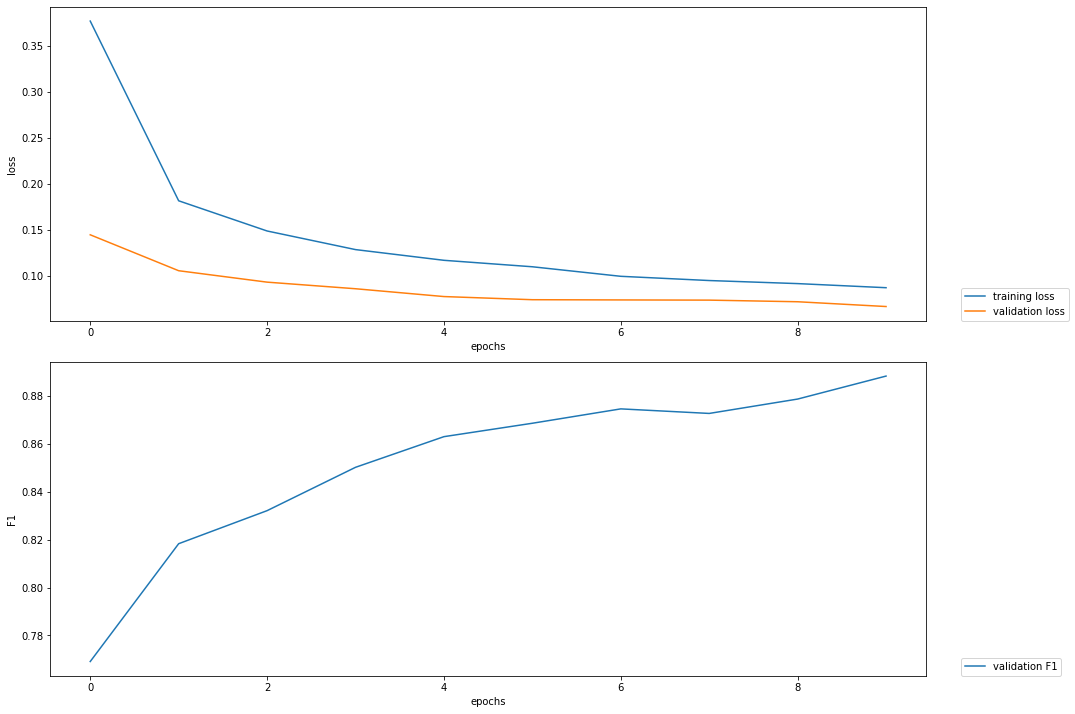

2023-02-16 17:15:54,332 Weights plots are saved in /content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/flairen_model/weights.png


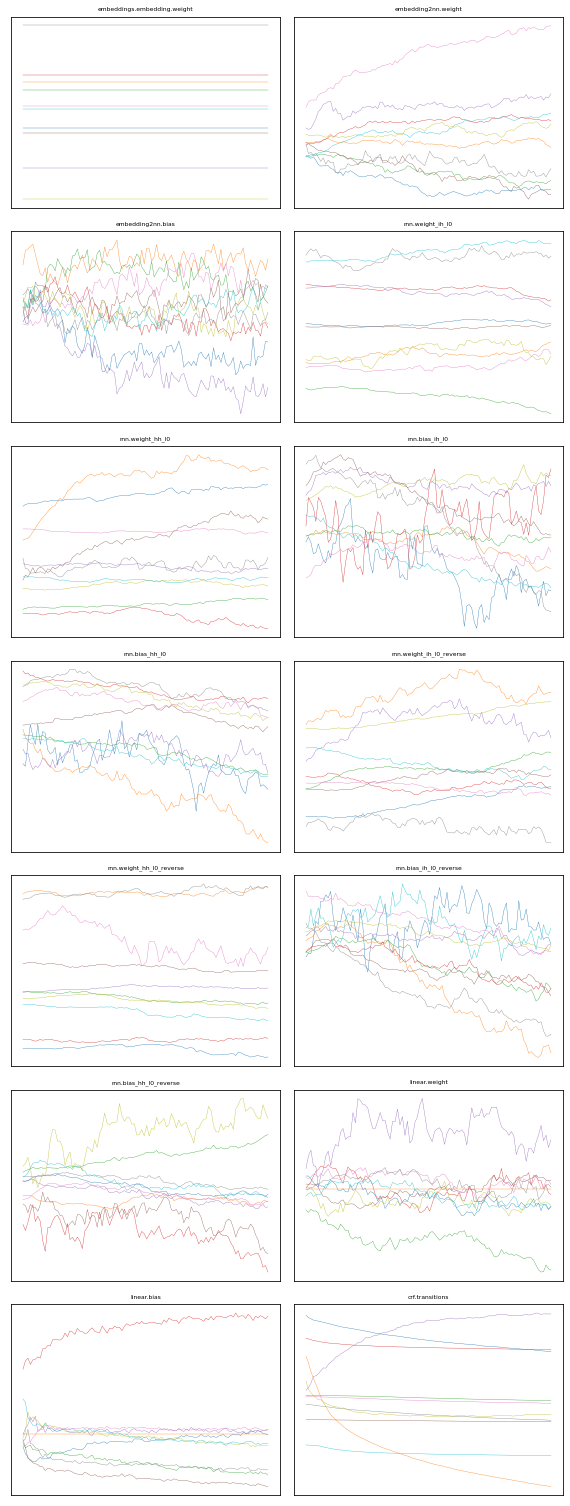

In [21]:
# TODO plot training loss and weights
# HINT Check documentation on training models with Flair
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/flairen_model/loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/flairen_model/weights.txt')

# ASSIGNMENT 2

In this assignment we will use the model trained in the previous step to automatically tag a document of your choice.

1. HINT: Revise the TUTORIAL_2_TAGGING to see how to use a SequenceTagger to tag texts. Remember that to use your own model you need to instantiate the SequenceTagger providing the full path of your model, like so:

```
ner_tagger = SequenceTagger.load('/content/drive/My Drive/Colab Notebooks/2023-ILTAPP/eu-flair-model/final-model.pt')
```

2. Save the document in your drive as a plain text file.
3. Load the file and instantiate the SequenceTagger with your model.
4. Predict the NER tags with your model.
5. Inspect the annotations obtained. You can do this in various ways:
  + By saving the annotated file to a text document in your drive.
  + By inspecting the annotations via iteration over the Sentence objects to extract the ner annotations for each token.


In [22]:
from flair.models import SequenceTagger

In [23]:
ner_tagger = SequenceTagger.load('/content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/flairen_model/final-model.pt')

2023-02-16 17:15:59,125 loading file /content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/flairen_model/final-model.pt
2023-02-16 17:16:03,627 SequenceTagger predicts: Dictionary with 19 tags: O, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-MISC, B-MISC, E-MISC, I-MISC, <START>, <STOP>


In [24]:
from flair.data import Sentence
tagger = SequenceTagger.load('ner')

/usr/local/lib/python3.8/dist-packages/huggingface_hub/file_download.py:629: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


2023-02-16 17:16:09,928 loading file /root/.flair/models/ner-english/4f4cdab26f24cb98b732b389e6cebc646c36f54cfd6e0b7d3b90b25656e4262f.8baa8ae8795f4df80b28e7f7b61d788ecbb057d1dc85aacb316f1bd02837a4a4
2023-02-16 17:16:12,019 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


In [27]:
text=open("/content/drive/MyDrive/NLP_Applications_1/DATA/2023-ILTAPP-20230203T201734Z-001/2023-ILTAPP/datasets/ner/flairen_model/New Text Document.txt",encoding="utf8").read()
sentence = Sentence(text)

ner_tagger.predict(sentence)
print(sentence.to_tagged_string())

tagger.predict(sentence)
print(sentence.to_tagged_string())

Sentence: "An apple is an edible fruit produced by an apple tree ( Malus domestica ) . Apple trees are cultivated worldwide and are the most widely grown species in the genus Malus . The tree originated in Central Asia , where its wild ancestor , Malus sieversii , is still found today . Apples have been grown for thousands of years in Asia and Europe and were brought to North America by European colonists . Apples have religious and mythological significance in many cultures , including Norse , Greek , and European Christian tradition ." → ["Malus domestica"/PER, "Apple"/ORG, "Malus"/PER, "Central Asia"/LOC, "Malus sieversii"/PER, "Asia"/LOC, "Europe"/LOC, "North America"/LOC, "European"/MISC, "Norse"/MISC, "Greek"/MISC, "European Christian"/MISC]
Sentence: "An apple is an edible fruit produced by an apple tree ( Malus domestica ) . Apple trees are cultivated worldwide and are the most widely grown species in the genus Malus . The tree originated in Central Asia , where its wild ancest